# Vancouver Police Department Crime Data Analysis - Final Report 

### Final Report



In [1]:
library(cowplot)
library(infer)
library(repr)
library(tidyverse)
library(broom)
library(reshape2)
library(patchwork)

── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──

✔ dplyr     1.1.0     ✔ readr     2.1.4

✔ forcats   1.0.0     ✔ stringr   1.5.0

✔ ggplot2   3.4.1     ✔ tibble    3.2.0

✔ lubridate 1.9.2     ✔ tidyr     1.3.0

✔ purrr     1.0.1     

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──

✖ dplyr::filter()    masks stats::filter()

✖ dplyr::lag()       masks stats::lag()

✖ lubridate::stamp() masks cowplot::stamp()

ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: 'reshape2'





The following object is masked from 'package:tidyr':



    smiths







Attaching package: 'patchwork'





The following object is masked from 'package:cowplot':



    align_plots






## Introduction

The COVID-19 pandemic has lead to significant reductions in income, increased unemployment, and disruptions in service and manufacturing industries (Song and Zhou, 2020).

On the other hand, COVID has also hugely impacted the crime rate (Abrams, 2020). In order to investigate how COVID affected the crime rate in Vancouver in particular, we will conduct a comprehensive inference analysis on the difference in criminal activity across 2 years (before and after COVID).

Using the crime database collected by the Vancouver Police Department (VPD), the main question of my analysis is: ***Is there a difference in the proportion of theft crimes between the year before COVID and the year after COVID?***

Denny Thomas and Aishwarya Nair from Reuters reported that Canada's first COVID carrier arrived in Toronto on January 22, 2020. Although the virus broke out in China in 2019, North America, including Canada, remained unaffected until this point. According to a news release by the BC government, a provincial state of emergency was declared due to the COVID-19 pandemic, indicating the severity of the situation. However, in 2020, BC began to experience the impact of COVID, with measures such as lockdowns and border closures being implemented. 2020 saw some of the harshest lockdown periods during the pandemic, and life began adjusting to the pandemic starting in 2021, so we will focus on only the comparison between 2019, the year before the pandemic, and 2020, the first year of the pandemic.

## Methods and Results

Here's an overview of my dataset:

The VPD dataset contains 48160 observations in 2019, and 37520 observations in 2020. Each observation in the dataset by VPD contains 10 variables which describe the type, time and location of each crime. The TYPE column includes multiple categories of crime but my main focus will be theft crime in general. The 'Other Theft' category includes a range of property related incidents such as shoplifting, theft of personal property (over / under $5000), mail theft, and utilities theft.

In [2]:
# You can download the zip file from the website, unzip and upload onto jupyter in the data folder
crime_data <- read_csv("https://raw.githubusercontent.com/HarlH/stat-201-project/main/data/crimedata_csv_AllNeighbourhoods_AllYears.csv")
head(crime_data)

Rows: 853944 Columns: 10

── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Delimiter: ","

chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD

dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y



ℹ Use `spec()` to retrieve the full column specification for this data.

ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Break and Enter Commercial,2012,12,14,8,52,NA,Oakridge,491285.0,5453433
Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490613.0,5457110
Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491007.8,5459174
Break and Enter Commercial,2021,4,26,4,44,10XX ALBERNI ST,West End,491007.8,5459174
Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.9,5459166
Break and Enter Commercial,2020,7,28,19,12,10XX ALBERNI ST,West End,491015.9,5459166


Table 1. Table of raw crime data

Since we are only focusing on the years 2019 and 2020, we will filter the data to only include those two years.
Here is the data for year 2019.

In [3]:
# Crime data for year 2019
crime_data_before_covid <- crime_data %>%
    filter(YEAR == 2019)

head(crime_data_before_covid)

TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490613.0,5457110
Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491007.8,5459174
Break and Enter Commercial,2019,12,31,23,30,10XX BEACH AVE,West End,490197.5,5458239
Break and Enter Commercial,2019,1,6,1,36,10XX BEACH AVE,West End,490234.4,5458201
Break and Enter Commercial,2019,6,9,10,58,10XX BEACH AVE,West End,490234.4,5458201
Break and Enter Commercial,2019,6,10,4,30,10XX BEACH AVE,Central Business District,490249.2,5458167


Table 2. Table of raw crime data in the year 2019

The second sample, from the year 2020:

In [4]:
# Crime data for year 2020
crime_data_after_covid <- crime_data %>%
    filter(YEAR == 2020)

head(crime_data_after_covid)

TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Break and Enter Commercial,2020,7,28,19,12,10XX ALBERNI ST,West End,491015.9,5459166
Break and Enter Commercial,2020,6,19,3,40,10XX ALBERNI ST,West End,491059.5,5459122
Break and Enter Commercial,2020,1,3,6,43,10XX ALBERNI ST,West End,491068.7,5459126
Break and Enter Commercial,2020,9,27,20,0,10XX ALBERNI ST,West End,491073.1,5459109
Break and Enter Commercial,2020,6,28,6,50,10XX ALBERNI ST,West End,491102.2,5459092
Break and Enter Commercial,2020,2,5,0,0,10XX BEACH AVE,West End,490227.2,5458210


Table 3. Table of raw crime data in the year 2020

We are only interested in theft crimes, so we calculate the proportion of all theft crimes:

$n_{2019}$ and $n_{2020}$ signify the total number of crimes committed in 2019 and 2020.

$t_{2019}$ and $t_{2020}$ signify the number of theft crimes committed in 2019 and 2020.

$p_{2019}$ and $p_{2020}$ signify the proportion of theft crimes committed in 2019 and 2020.

In [5]:
# Aggregate all type of theft crime
theft_2019 <- crime_data_before_covid %>%
    filter(TYPE %in% c("Other Theft", "Theft from Vehicle", "Theft of Vehicle", "Theft of Bicycle")) 

# Summary table of crime rate
summary <- crime_data_before_covid %>%
    summarize(n_2019 = nrow(crime_data_before_covid),
              t_2019 = nrow(theft_2019), 
              p_2019 = t_2019 / n_2019)

summary

n_2019,t_2019,p_2019
<int>,<int>,<dbl>
48160,32931,0.6837832


Table 4. summary values from 2019

The same summarization can also be performed on the 2020 sample:

In [6]:
# Aggregate all type of theft crime
theft_2020 <- crime_data_after_covid %>%
    filter(TYPE %in% c("Other Theft", "Theft from Vehicle", "Theft of Vehicle", "Theft of Bicycle")) 

# Summary table of crime rate
summary <- summary %>%
    mutate(t_2020 = nrow(theft_2020),
           n_2020 = nrow(crime_data_after_covid), 
           p_2020 = t_2020 / n_2020)

summary

n_2019,t_2019,p_2019,t_2020,n_2020,p_2020
<int>,<int>,<dbl>,<int>,<int>,<dbl>
48160,32931,0.6837832,21919,37520,0.5841951


Table 5. summary values from 2019 and 2020

We now plot the proportion of theft crimes from the two years.

Warning message in geom_histogram(stat = "identity"):

"Ignoring unknown parameters: `binwidth`, `bins`, and `pad`"


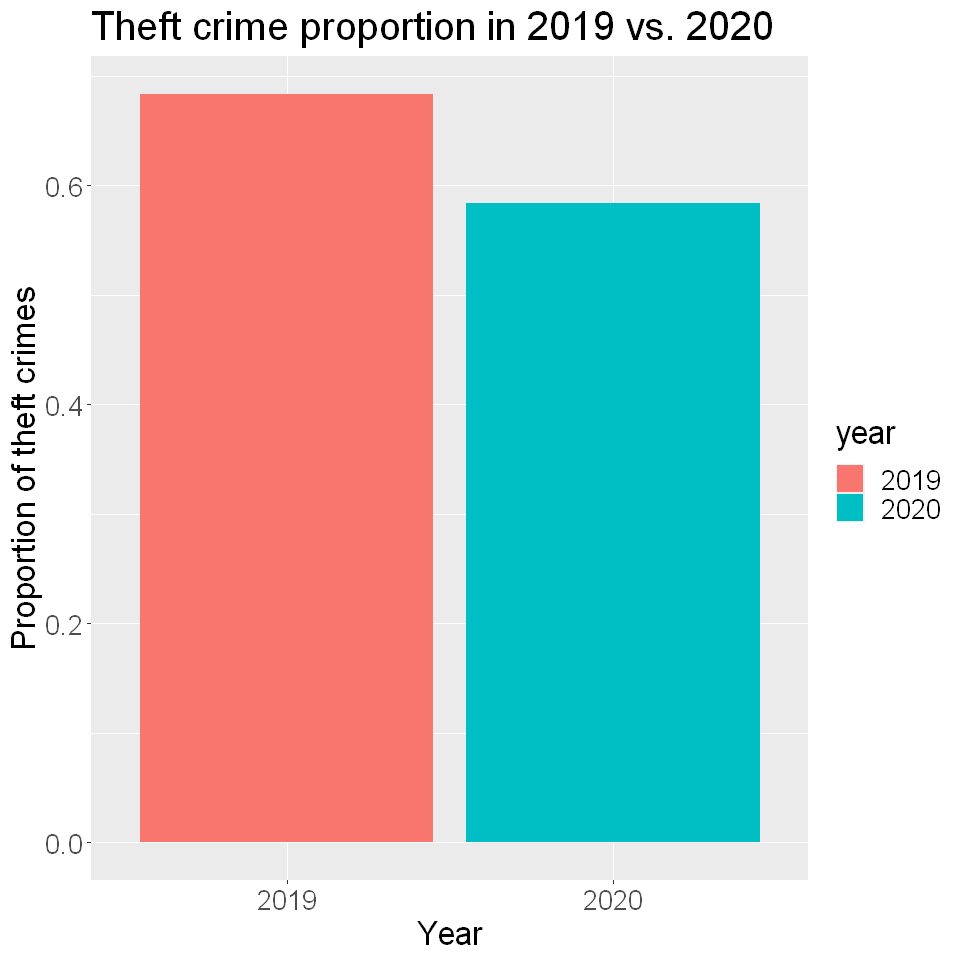

In [7]:
options(repr.plot.width = 8, repr.plot.height = 8)

tibble(year = c("2019", "2020"), prop = c(summary$p_2019, summary$p_2020)) %>%
    ggplot(aes(x = year, y = prop, fill = year)) +
    geom_histogram(stat = "identity") +
    ggtitle("Theft crime proportion in 2019 vs. 2020") +
    xlab("Year") +
    ylab("Proportion of theft crimes") +
    theme(text = element_text(size = 20))

Figure 1. Bar plot of proportion of theft crimes in 2019 vs 2020

My proposed hypothesis test will utilize a significance level of 95%. My hypotheses are as follows:

$H_0: p_{2020} - p_{2019} = 0$

$H_a: p_{2020} - p_{2019} \neq 0$

### CLT

Because the sample size is very large (in the tens of thousands), and we are calculating a difference in proportions, CLT can apply, since both $n\hat{p}, n(1 - \hat{p}) >> 10$ for both samples. This means that we can approximate the difference in proportions using an appropriate normal distribution.

We begin by calculating the difference in proportions, $p_{2020} - p_{2019}$.

In [8]:
summary <- summary %>%
    mutate(diff_in_props = p_2020 - p_2019)

summary

n_2019,t_2019,p_2019,t_2020,n_2020,p_2020,diff_in_props
<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>
48160,32931,0.6837832,21919,37520,0.5841951,-0.09958813


Table 6. summary values of 2019 and 2020, now with difference in proportions

We then calculate the standard error, defined as $\sqrt{\dfrac{p_{2019} \cdot (1 - p_{2019})}{n_{2019}} + \dfrac{p_{2020} \cdot (1 - p_{2020})}{n_{2020}}}$.

In [9]:
summary <- summary %>%
    mutate(diff_std_error = sqrt(p_2019 * (1 - p_2019) / n_2019 + p_2020 * (1 - p_2020) / n_2020))

summary

n_2019,t_2019,p_2019,t_2020,n_2020,p_2020,diff_in_props,diff_std_error
<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
48160,32931,0.6837832,21919,37520,0.5841951,-0.09958813,0.003311174


Table 6. summary values of 2019 and 2020, now with standard error of difference in proportions

We can then obtain the 95% confidence interval by using `qnorm`.

In [10]:
clt_ci <- tibble(
    lower_ci_clt = qnorm(0.025, summary$diff_in_props, summary$diff_std_error),
    upper_ci_clt = qnorm(0.975, summary$diff_in_props, summary$diff_std_error)
)

clt_ci

lower_ci_clt,upper_ci_clt
<dbl>,<dbl>
-0.1060779,-0.09309834


Table 7. Confidence interval from CLT

We can interpret the above interval as:

If we repeat this analysis many times, 95% of the 95% CIs produced by the analyses would contain the true difference in proportions of theft crimes between 2020 and 2019.

We can also obtain a p value:

In [11]:
summary <- summary %>%
    mutate(p_value_ci = 2 * pnorm(diff_in_props / diff_std_error))
summary

n_2019,t_2019,p_2019,t_2020,n_2020,p_2020,diff_in_props,diff_std_error,p_value_ci
<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
48160,32931,0.6837832,21919,37520,0.5841951,-0.09958813,0.003311174,9.87023e-199


Table 8. p-value from CLT

As we can see, the p-value is extremely small, so **there is evidence to reject the null hypothesis here**.

We can also use `prop.test` to double check the work:

In [12]:
prop_test <- tidy(
    prop.test(
        x = c(summary$t_2020, summary$t_2019), # an array with the number of successes in each sample
        n = c(summary$n_2020, summary$n_2019), # an array with the size of each sample
        correct = FALSE
    )
)

prop_test

estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.5841951,0.6837832,908.0165,1.774765e-199,1,-0.1060779,-0.09309834,2-sample test for equality of proportions without continuity correction,two.sided


Table 9. results from `prop.test`

We can see that the p-value is similarly very small, and the confidence interval matches.

We can also plot what the null model and test statistic looks like (code from worksheet 8)

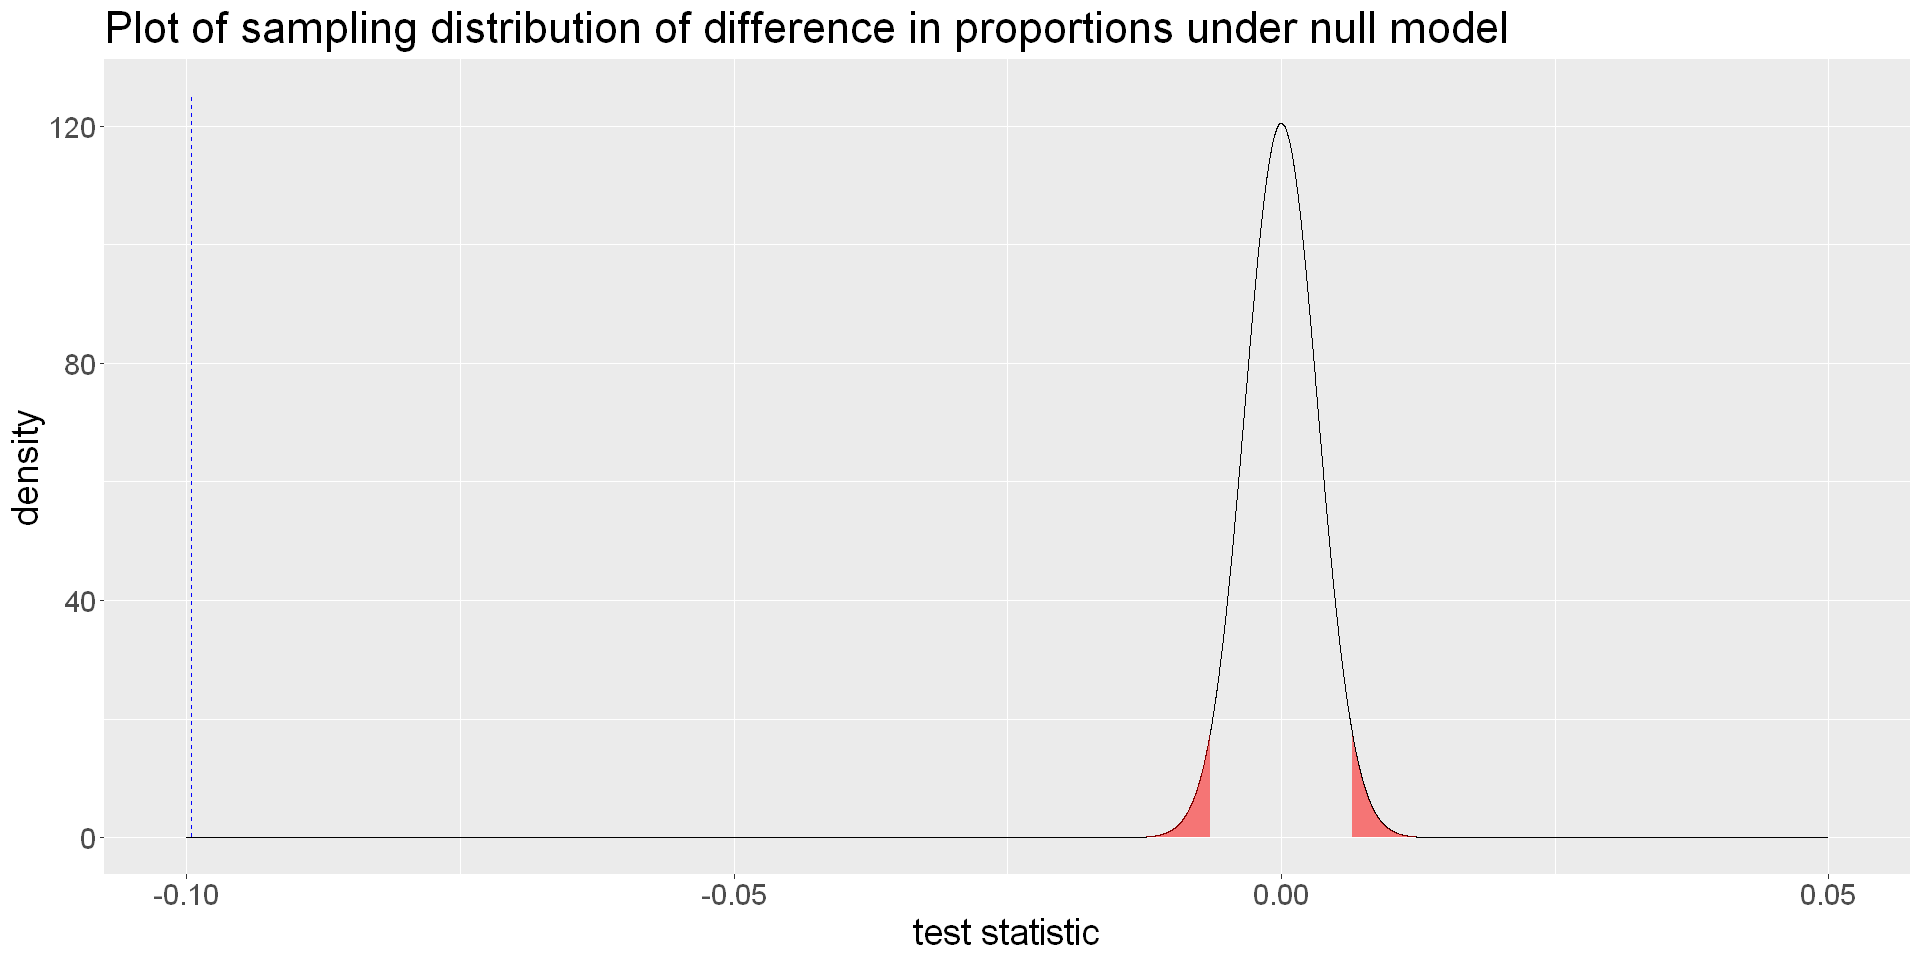

In [13]:
options(repr.plot.width = 16, repr.plot.height = 8)

# code from worksheet 8
tibble(z = seq(-0.10, 0.05, 0.00001), density = dnorm(z, mean = 0, sd = summary$diff_std_error)) %>% 
    ggplot() + geom_line(aes(z, density)) + # plot the density curve
    geom_segment(aes(x = summary$diff_in_props, 
                     y = 0, 
                     xend = summary$diff_in_props,
                     yend = 125),
                 colour="blue", linetype = 'dashed') + # plot dashed line corresponding to the test statistic
    geom_ribbon(. %>% filter(z > qnorm(0.975, mean = 0, sd = summary$diff_std_error)),
                mapping = aes(x = z, ymax = density, ymin = 0), alpha = 0.5, fill = "red") + # plot the upper tail reject hypothesis region
    geom_ribbon(. %>% filter(z < qnorm(0.025, mean = 0, sd = summary$diff_std_error)),
                mapping = aes(x = z, ymax = density, ymin = 0), alpha = 0.5, fill = "red") + # plot the lower tail reject hypothesis region
    theme(text = element_text(size=22)) + 
    xlab("test statistic") +
    ggtitle("Plot of sampling distribution of difference in proportions under null model")

Figure 2. Plot of the test statistic in sampling distribution of difference in proportions assuming the null model.

We can clearly see that the test statistic is *far* into the "reject null hypothesis" region.

### Bootstrapping

We can also do some bootstrapping, though this will take a little bit of setup.

We first need to mutate the data so that "success" is defined as the crime being a theft crime.

Bootstrap CI code is adapted from tutorial 7.

In [14]:
bootstrap_data <- crime_data %>%
    filter(YEAR %in% c(2019, 2020)) %>% # get relevant years
    mutate(is_theft_crime = TYPE %in% c("Other Theft", "Theft from Vehicle", "Theft of Vehicle", "Theft of Bicycle")) %>%
    mutate(is_theft_crime = factor(is_theft_crime), YEAR = factor(YEAR)) %>%
    select(YEAR, is_theft_crime)

set.seed(1234)

bootstrap <-
    bootstrap_data %>%
    specify(formula = is_theft_crime ~ YEAR, success = "TRUE") %>%
    generate(reps = 1000, type = "bootstrap") %>%
    calculate(stat = "diff in props", order = c("2020", "2019"))

btsp_ci <- bootstrap %>%
    get_ci()

btsp_ci

lower_ci,upper_ci
<dbl>,<dbl>
-0.1061417,-0.0927876


Table 10. Confidence interval from bootstrapping

We compare the above against the CI we got from CLT:

In [15]:
clt_ci

lower_ci_clt,upper_ci_clt
<dbl>,<dbl>
-0.1060779,-0.09309834


Table 11. Confidence interval from CLT, again

We can see that the intervals are very similar. It seems that the bootstrap CI is shifted slightly closer to 0 compared to the CLT CI.

We could also try the shuffles/permutations resampling method to obtain a p-value:

In [16]:
set.seed(4321)

obs_diff_prop <- bootstrap_data %>%
    specify(is_theft_crime ~ YEAR, success = "TRUE") %>%
    calculate(stat = "diff in props", order = c("2020", "2019"))

summary <- summary %>%
    mutate(p_value_permute =
           specify(bootstrap_data, formula = is_theft_crime ~ YEAR, success = "TRUE") %>%
           hypothesize(null = "independence") %>%
           generate(reps = 1000, type = "permute") %>%
           calculate(stat = "diff in props", order = c("2020", "2019")) %>%
           get_p_value(obs_stat = obs_diff_prop, direction = "both") %>%
           pull())

summary

Warning message:

"There was 1 warning in `mutate()`.

ℹ In argument: `p_value_permute = ... %>% pull()`.

Caused by warning:

! Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information."


n_2019,t_2019,p_2019,t_2020,n_2020,p_2020,diff_in_props,diff_std_error,p_value_ci,p_value_permute
<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
48160,32931,0.6837832,21919,37520,0.5841951,-0.09958813,0.003311174,9.87023e-199,0


Table 12. p-value for permutations method

We can see that the p-value here is 0, because we can see from the theoretical (CLT) method that the p-value is actually extremely tiny, so we would need a massive number of reps to get even one result on the other side of 0. This indicates that the bootstrap method may not be very reliable, because its result says that it is *impossible* for the null hypothesis to be true, which is not something we can prove.

## Discussion

The findings of this study indicate that the proportion of theft crimes in Vancouver changed significantly during the COVID-19 lockdown in 2020, compared to the previous year. This supports my hypothesis that the economic downturn caused by COVID-19 contributed to a change in theft crimes.

These findings have significant implications because they suggest that the COVID-19 pandemic had a direct impact on Vancouver's crime rate. This has significant implications for law enforcement and policy makers who must consider the impact of economic downturns and social isolation measures on crime rates.

In terms of future research, this study could lead to more research into the specific types of theft crimes most affected by COVID, as well as other types of crime that may have been impacted by the pandemic. It may also be worthwhile to investigate whether certain demographics or neighborhoods were disproportionately affected by the change in theft crimes.

Furthermore, it would be interesting to look into whether there is a direct link between the change in crime and COVID, and whether crime rates will return to pre-pandemic levels once the pandemic is over. This could include looking at crime rates in other cities and countries to see if similar trends exist, as well as looking into the potential long-term effects of the pandemic on crime rates.

Overall, the study's findings emphasize the importance of understanding the complex relationship between social and economic factors and crime rates, as well as the need for additional research to fully understand the impact of the COVID-19 pandemic on crime rates in Vancouver and elsewhere.

## References

Abrams, D. S. (2021). Covid and crime: An early empirical look. Journal of Public Economics, 194. https://doi.org/10.1016/j.jpubeco.2020.104344

Data from https://geodash.vpd.ca/opendata/.

General, P. S. and S. (2020, March 18). Province declares state of emergency to support COVID-19 response. Retrieved April 11, 2023, from https://news.gov.bc.ca/releases/2020PSSG0017-000511 

Song, L., & Zhou, Y. (2020). COVID‐19 pandemic and its impact on the global economy: What does it take to turn crisis into opportunity? China & World Economy, doi:https://doi.org/10.1111/cwe.12349

Thomas, D., &amp; Nair, A. (2020, January 25). Canada identifies first case of coronavirus. Reuters. Retrieved April 11, 2023, from https://www.reuters.com/article/us-china-health-canada-idUSKBN1ZO0T9 

